In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, roc_curve, accuracy_score, mean_squared_error

In [5]:
# read the CSV file and store its contents in the DataFrame (df).

engine_df=pd.read_csv("engine_data.csv")


In [6]:
# to get the first five records in DataFrame

engine_df.head()

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         700          2.493592      11.790927          3.178981   
1         876          2.941606      16.193866          2.464504   
2         520          2.961746       6.553147          1.064347   
3         473          3.707835      19.510172          3.727455   
4         619          5.672919      15.738871          2.052251   

   lub oil temp  Coolant temp  Engine Condition  
0     84.144163     81.632187                 1  
1     77.640934     82.445724                 0  
2     77.752266     79.645777                 1  
3     74.129907     71.774629                 1  
4     78.396989     87.000225                 0

In [7]:
# retrieve the dimensions of a DataFrame

engine_df.shape

(19535, 7)

In [8]:
# getting  a short information about the number of non-null values, data types of each column, and memory usage of the data

engine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


### EDA (Exploratory Data Analysis)

In [9]:
#  used to generate descriptive statistics for each column

engine_df.describe(include="all")

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
count  19535.000000      19535.000000   19535.000000      19535.000000   
mean     791.239263          3.303775       6.655615          2.335369   
std      267.611193          1.021643       2.761021          1.036382   
min       61.000000          0.003384       0.003187          0.002483   
25%      593.000000          2.518815       4.916886          1.600466   
50%      746.000000          3.162035       6.201720          2.166883   
75%      934.000000          4.055272       7.744973          2.848840   
max     2239.000000          7.265566      21.138326          7.478505   

       lub oil temp  Coolant temp  Engine Condition  
count  19535.000000  19535.000000      19535.000000  
mean      77.643420     78.427433          0.630509  
std        3.110984      6.206749          0.482679  
min       71.321974     61.673325          0.000000  
25%       75.725990     73.895421          0.000000  
50%       76.817350     78.346662          1.000000  
75%       78.071691     82.915411          1.000000  
max       89.580796    195.527912          1.000000

In [10]:
# check for missing values in each column

engine_df.isnull().sum()

Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64

The DataFrame has no missing values in any of its columns.

In [11]:
# identify duplicate rows and calculate the number of duplicate rowsin DataFrame

engine_df.duplicated().sum()

0

The DataFrame contains only unique records; there are no duplicated rows.

## Data Visualization

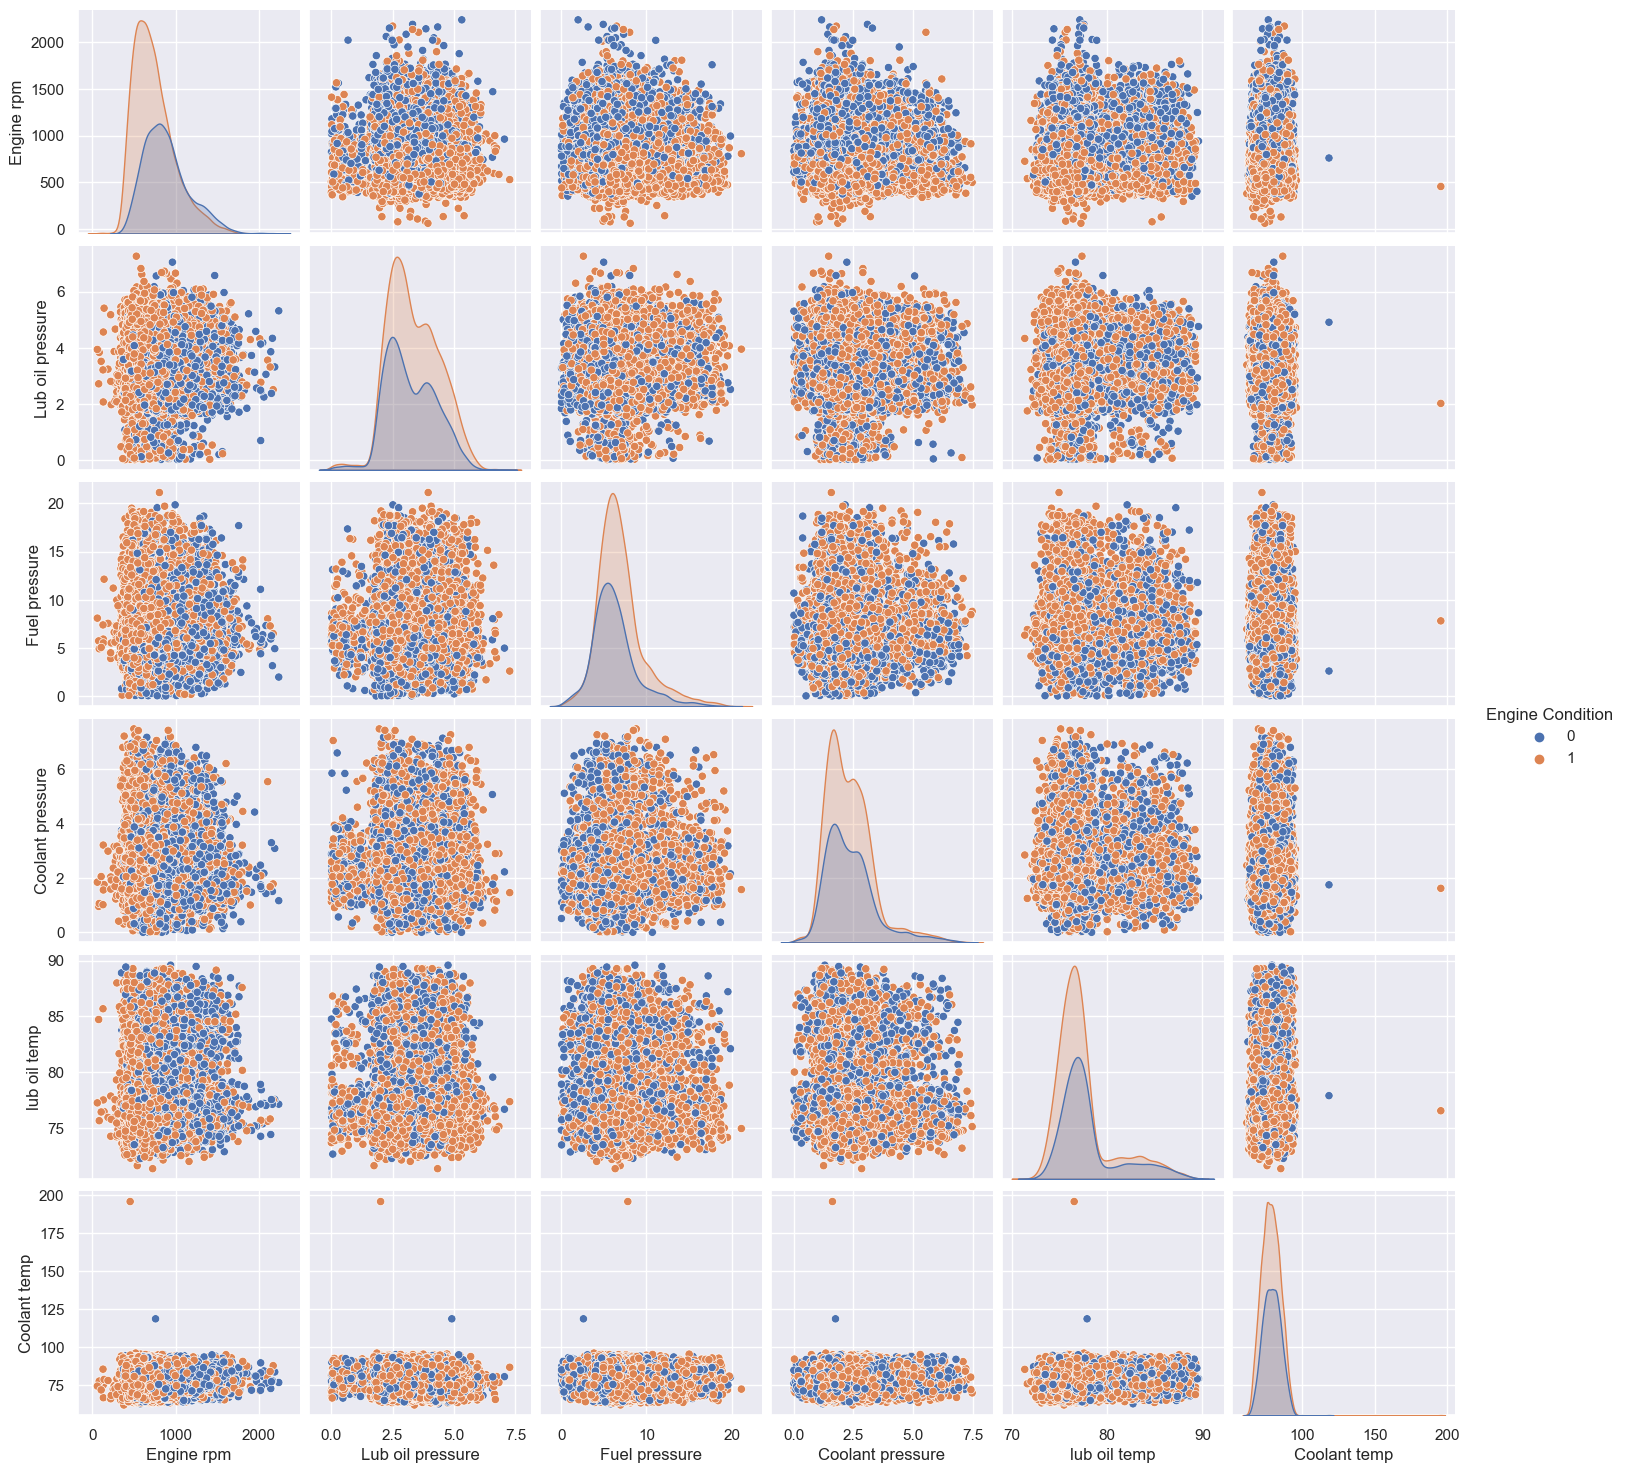

In [409]:
sns.pairplot(engine_df, hue="Engine Condition")

In [12]:
corr_matrix = engine_df.corr()
corr_matrix["Engine Condition"].sort_values(ascending=False)

Engine Condition    1.000000
Fuel pressure       0.116259
Lub oil pressure    0.060904
Coolant pressure   -0.024054
Coolant temp       -0.046326
lub oil temp       -0.093635
Engine rpm         -0.268201
Name: Engine Condition, dtype: float64

Engine Condition has the highest positive correlation with Fuel Pressure


Engine Condition has the highest negative correlation with Engine RPM

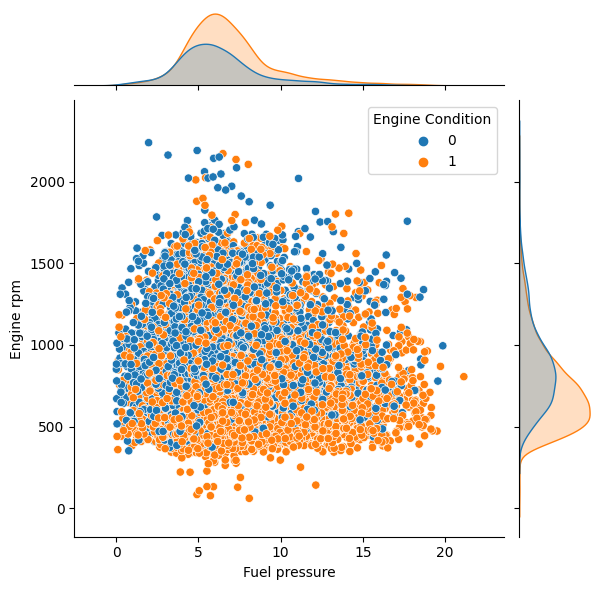

In [12]:
sns.jointplot(engine_df, x="Fuel pressure", y="Engine rpm", hue="Engine Condition")

## **Class Balancing**

Engine Condition
1    12317
0     7218
Name: count, dtype: int64


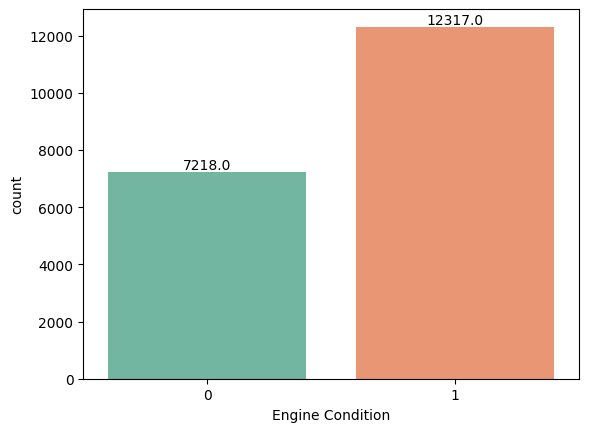

In [13]:

# Get the number of data points in each class

class_counts = engine_df["Engine Condition"].value_counts()

# Print the class counts

print(class_counts)

sns.countplot(x="Engine Condition", data=engine_df,palette="Set2")

# Add annotations
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha="center", va="bottom")

plt.show()



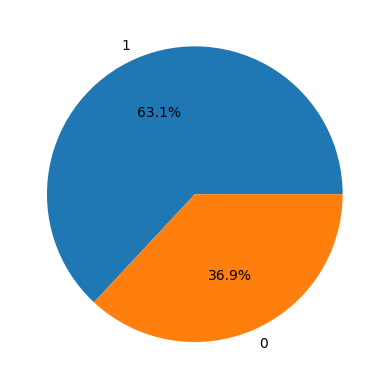

In [14]:
 # using the matplotlib library to create a pie chart based on the class distribution of the "Engine Condition"
plt.pie(engine_df['Engine Condition'].value_counts(),labels=engine_df['Engine Condition'].value_counts().index,autopct='%1.1f%%');

In [15]:
# Importing the SMOTE class from the imblearn.over_sampling
from imblearn.over_sampling import SMOTE

#  loaded  dataset into variables x and y
x=engine_df.drop(['Engine Condition'],axis=1)  # Feature variables
y=engine_df[['Engine Condition']]  #  Target variable

# Apply SMOTE to the dataset
def apply_smote(x, y):
    smote = SMOTE()
    x_smote, y_smote = smote.fit_resample(x, y)
    return x_smote, y_smote

#  Usage of applying SMOTE fuction
x_smote, y_smote = apply_smote(x, y)


In [16]:
#  creates a new DataFrame called df_balanced to contain oversampled data with a balanced class distribution

engine_df1 = pd.DataFrame(np.column_stack((x_smote, y_smote)), columns=[
    "Engine rpm", "Lub oil pressure", "Fuel pressure", "Coolant pressure", "lub oil temp",
    "Coolant temp","Engine Condition"
])

# Check the class distribution of newly created DataFrame "df_balanced "
class_distribution = engine_df1['Engine Condition'].value_counts()
print(class_distribution)


Engine Condition
1.0    12317
0.0    12317
Name: count, dtype: int64


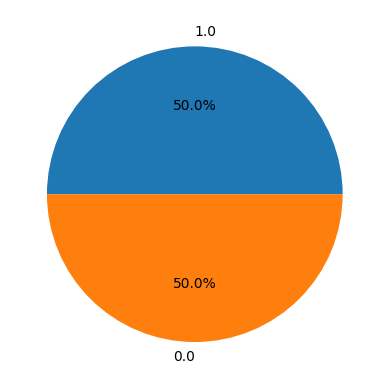

In [17]:
 # using the matplotlib library to create a pie chart based on the class distribution of the "Engine Condition"  after balancing the classes

plt.pie(engine_df1['Engine Condition'].value_counts(),labels=engine_df1['Engine Condition'].value_counts().index,autopct='%1.1f%%');

In [18]:
engine_df1.shape

(24634, 7)

## APPLYING MODELS ON THE ORIGINAL DATASET

Scaling the Original Data

In [19]:
# Create an instance of StandardScaler

std_scale=StandardScaler()
std_scale

StandardScaler()

In [20]:
# Defining column names to be scaled

column_names= ["Engine rpm",	"Lub oil pressure",	"Fuel pressure",	"Coolant pressure",	"lub oil temp",	"Coolant temp"]

# Fit and transform the data by loop to iterate over each column name

for col in column_names:
    engine_df1[[col]] = std_scale.fit_transform(engine_df1[[col]])

In [21]:
# # To view the first 5 records of DataFrame "df_balanced" after scaling

engine_df1.head()

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0   -0.406689         -0.800142       1.955508          0.839543   
1    0.244096         -0.345923       3.595207          0.130203   
2   -1.072265         -0.325505       0.004905         -1.259889   
3   -1.246054          0.430917       4.830233          1.384075   
4   -0.706198          2.423214       3.425762         -0.279086   

   lub oil temp  Coolant temp  Engine Condition  
0      2.087217      0.514473               1.0  
1     -0.019826      0.648205               0.0  
2      0.016245      0.187939               1.0  
3     -1.157398     -1.105951               1.0  
4      0.225135      1.396892               0.0

In [22]:
# Step 1: Data Preprocessing
X = engine_df1.drop("Engine Condition", axis=1)
y = engine_df1["Engine Condition"]

# Step 1a: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# create an instance of the LogisticRegression class and assigns it to the variable

logistic_model=LogisticRegression(verbose=True)


In [24]:
# Fit the Logistic Regression model

logistic_model.fit(X_train,y_train)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.36599D+04    |proj g|=  2.68357D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6      7      1     0     0   3.657D-03   1.257D+04
  F =   12574.665441927333     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(verbose=True)

In [25]:
# Predict on training and test data

y_train_predicted = logistic_model.predict(X_train)
y_test_predicted = logistic_model.predict(X_test)


In [26]:
# Accuracy - Training Data

logistic_model.score(X_train,y_train)

0.6421068655807581

In [27]:
# Accuracy - Test data

logistic_model.score(X_test,y_test)

0.6462350314593058

In [28]:
# To print the classification report for train data

print(classification_report(y_train,y_train_predicted))

              precision    recall  f1-score   support

         0.0       0.65      0.62      0.63      9869
         1.0       0.63      0.67      0.65      9838

    accuracy                           0.64     19707
   macro avg       0.64      0.64      0.64     19707
weighted avg       0.64      0.64      0.64     19707



In [29]:
# To print the classification report for test data

print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

         0.0       0.65      0.61      0.63      2448
         1.0       0.64      0.68      0.66      2479

    accuracy                           0.65      4927
   macro avg       0.65      0.65      0.65      4927
weighted avg       0.65      0.65      0.65      4927



Random Forest Classifier

In [30]:
# create an instance of the RandomForestClassifier class and assigns it to the variable

Rf_model= RandomForestClassifier(max_depth=3)

In [31]:
# Fit the RandomForestClassifier model

Rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=3)

In [32]:
# Predict on training and test data


ytrain_predict=Rf_model.predict(X_train)
ytest_predict=Rf_model.predict(X_test)

In [33]:
# Accuracy - Training Data

Rf_model.score(X_train,y_train)

0.6507332419952301

In [34]:
# Accuracy - Test data

Rf_model.score(X_test,y_test)

0.6504972599959408

In [35]:
# To print the classification report for train data

print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.64      0.71      0.67      9869
         1.0       0.67      0.59      0.63      9838

    accuracy                           0.65     19707
   macro avg       0.65      0.65      0.65     19707
weighted avg       0.65      0.65      0.65     19707



In [36]:
# To print the classification report for test data

print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

         0.0       0.63      0.70      0.67      2448
         1.0       0.67      0.60      0.63      2479

    accuracy                           0.65      4927
   macro avg       0.65      0.65      0.65      4927
weighted avg       0.65      0.65      0.65      4927



KNN

In [37]:
# creates an instance of the KNeighborsClassifier class and assigns it to the variable

knn_model = KNeighborsClassifier(n_neighbors=85,p=2,metric="euclidean")

In [38]:
# Fit the KNeighborsClassifier model

knn_model.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=85)

In [39]:
# Predict on training and test data


ytrain_predict=knn_model.predict(X_train)
ytest_predict=knn_model.predict(X_test)

In [40]:
# Accuracy - Training Data

knn_model.score(X_train,y_train)

0.6645861876490587

In [41]:
# Accuracy - Test data

knn_model.score(X_test,y_test)

0.6561802313781205

In [42]:
# To print the classification report for train data

print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.65      0.72      0.68      9869
         1.0       0.69      0.61      0.64      9838

    accuracy                           0.66     19707
   macro avg       0.67      0.66      0.66     19707
weighted avg       0.67      0.66      0.66     19707



In [43]:
# To print the classification report for test data

print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

         0.0       0.64      0.72      0.67      2448
         1.0       0.68      0.60      0.64      2479

    accuracy                           0.66      4927
   macro avg       0.66      0.66      0.66      4927
weighted avg       0.66      0.66      0.65      4927



### Support Vector Machine

In [44]:
#  creates an instance of the SVC class from the svm module and assigns it to the variable

svc_model = SVC(kernel='linear')

In [45]:
# Fit the  SVC  model

svc_model.fit(X_train,y_train)

SVC(kernel='linear')

In [46]:
# Predict on training and test data


ytrain_predict=svc_model.predict(X_train)
ytest_predict=svc_model.predict(X_test)

In [41]:
# Accuracy - Training Data

svc_model.score(X_train,y_train)

0.6373877302481352

In [42]:
# Accuracy - Test data

svc_model.score(X_test,y_test)

0.6525268926324336

In [43]:
# To print the classification report for train data

print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.65      0.60      0.62      9869
         1.0       0.63      0.68      0.65      9838

    accuracy                           0.64     19707
   macro avg       0.64      0.64      0.64     19707
weighted avg       0.64      0.64      0.64     19707



In [44]:
# To print the classification report for test data

print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

         0.0       0.66      0.62      0.64      2448
         1.0       0.64      0.69      0.67      2479

    accuracy                           0.65      4927
   macro avg       0.65      0.65      0.65      4927
weighted avg       0.65      0.65      0.65      4927



### Extreme Gradient Boosting

In [47]:
# Create an XGBoost classifier object and assigns  it to variable

xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3)


In [48]:
#  Fits  the XGBoost model on the training data

xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [49]:
# Accuracy - Training Data

xgb_model.score(X_train,y_train)

0.8465519866037449

In [50]:
# Accuracy - Test data

xgb_model.score(X_test,y_test)

0.6584128272782627

In [51]:
# Predict on training and test data

ytrain_predict=xgb_model.predict(X_train)

ytest_pred = xgb_model.predict(X_test)

In [52]:
# To print the classification report for train data

print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85      9869
         1.0       0.87      0.81      0.84      9838

    accuracy                           0.85     19707
   macro avg       0.85      0.85      0.85     19707
weighted avg       0.85      0.85      0.85     19707



In [53]:
# To print the classification report for test data

print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

         0.0       0.65      0.59      0.62      2448
         1.0       0.63      0.69      0.66      2479

    accuracy                           0.64      4927
   macro avg       0.64      0.64      0.64      4927
weighted avg       0.64      0.64      0.64      4927



### Decision Tree Classifier

In [54]:
# Initialise a Decision Tree Classifier and assign it to variable

dt_model= DecisionTreeClassifier(max_depth=3)

In [55]:
# Fit the model DecisionTreeClassifier model

dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [56]:
# Predict on training and test data


ytrain_predict=dt_model.predict(X_train)
ytest_predict=dt_model.predict(X_test)

In [57]:
# Accuracy - Training Data

dt_model.score(X_train,y_train)

0.6323641345714721

In [58]:
# Accuracy - Test data

dt_model.score(X_test,y_test)

0.6302009336310128

In [59]:
# To print the classification report for train data

print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.60      0.80      0.69      9869
         1.0       0.70      0.46      0.56      9838

    accuracy                           0.63     19707
   macro avg       0.65      0.63      0.62     19707
weighted avg       0.65      0.63      0.62     19707



In [60]:
# To print the classification report for test data

print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

         0.0       0.60      0.79      0.68      2448
         1.0       0.70      0.47      0.56      2479

    accuracy                           0.63      4927
   macro avg       0.65      0.63      0.62      4927
weighted avg       0.65      0.63      0.62      4927



## FEATURE EXTENSION

In [61]:
engine_df_ex = engine_df.copy()
engine_df_ex

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0             700          2.493592      11.790927          3.178981   
1             876          2.941606      16.193866          2.464504   
2             520          2.961746       6.553147          1.064347   
3             473          3.707835      19.510172          3.727455   
4             619          5.672919      15.738871          2.052251   
...           ...               ...            ...               ...   
19530         902          4.117296       4.981360          4.346564   
19531         694          4.817720      10.866701          6.186689   
19532         684          2.673344       4.927376          1.903572   
19533         696          3.094163       8.291816          1.221729   
19534         504          3.775246       3.962480          2.038647   

       lub oil temp  Coolant temp  Engine Condition  
0         84.144163     81.632187                 1  
1         77.640934     82.445724                 0  
2         77.752266     79.645777                 1  
3         74.129907     71.774629                 1  
4         78.396989     87.000225                 0  
...             ...           ...               ...  
19530     75.951627     87.925087                 1  
19531     75.281430     74.928459                 1  
19532     76.844940     86.337345                 1  
19533     77.179693     73.624396                 1  
19534     75.564313     80.421421                 1  

[19535 rows x 7 columns]

In [62]:
# to calculate the engine load by relating  the engine rpm  with the Lub oil pressure and Fuel pressure

engine_df_ex['Engine Load'] = (engine_df['Engine rpm']  * engine_df['Fuel pressure']) / 2


In [63]:
# to calculate the Coolant Flow Rate by relating the coolant pressure and the coolant temperature.

engine_df_ex['Coolant Flow Rate'] = engine_df['Coolant pressure'] / engine_df['Coolant temp']


In [64]:
# to calculate the Heat Load by relating the lub oil temperature and the coolant temperature.

engine_df_ex['Heat Load'] = engine_df['lub oil temp'] + engine_df['Coolant temp']


In [65]:
# to calculate the Engine Health Matrix by relating the Lub oil pressure subtracted by lub oil temperature.
engine_df_ex['Engine Health Matrix'] = engine_df['Lub oil pressure'] - engine_df['lub oil temp'] 


In [66]:
# to calculate the Fuel Efficiency by relating the Fuel pressure divided by the Engine rpm * coolant temperature.

engine_df_ex['Fuel Efficiency'] = engine_df['Fuel pressure'] / (engine_df['Engine rpm']*engine_df['Coolant temp'])


In [67]:
# to calculate the Cooling_Performance_Index by relating the Coolant pressure multipled by Coolant temp and divided by the Engine rpm * lub oil temp.

engine_df_ex['Cooling_Performance_Index'] = engine_df['Coolant pressure'] * engine_df['Coolant temp'] / (engine_df['Engine rpm']*engine_df['lub oil temp'])


In [68]:
# to get the first five records in DataFrame

engine_df_ex.head()

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         700          2.493592      11.790927          3.178981   
1         876          2.941606      16.193866          2.464504   
2         520          2.961746       6.553147          1.064347   
3         473          3.707835      19.510172          3.727455   
4         619          5.672919      15.738871          2.052251   

   lub oil temp  Coolant temp  Engine Condition  Engine Load  \
0     84.144163     81.632187                 1  4126.824583   
1     77.640934     82.445724                 0  7092.913115   
2     77.752266     79.645777                 1  1703.818197   
3     74.129907     71.774629                 1  4614.155598   
4     78.396989     87.000225                 0  4871.180701   

   Coolant Flow Rate   Heat Load  Engine Health Matrix  Fuel Efficiency  \
0           0.038943  165.776349            -81.650571         0.000206   
1           0.029892  160.086659            -74.699328         0.000224   
2           0.013364  157.398042            -74.790520         0.000158   
3           0.051933  145.904536            -70.422072         0.000575   
4           0.023589  165.397214            -72.724070         0.000292   

   Cooling_Performance_Index  
0                   0.004406  
1                   0.002987  
2                   0.002097  
3                   0.007630  
4                   0.003679

In [69]:
# retrieve the dimensions of a DataFrame

engine_df_ex.shape

(19535, 13)

In [70]:
# getting  a short information about the number of non-null values, data types of each column, and memory usage of the data

engine_df_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Engine rpm                 19535 non-null  int64  
 1   Lub oil pressure           19535 non-null  float64
 2   Fuel pressure              19535 non-null  float64
 3   Coolant pressure           19535 non-null  float64
 4   lub oil temp               19535 non-null  float64
 5   Coolant temp               19535 non-null  float64
 6   Engine Condition           19535 non-null  int64  
 7   Engine Load                19535 non-null  float64
 8   Coolant Flow Rate          19535 non-null  float64
 9   Heat Load                  19535 non-null  float64
 10  Engine Health Matrix       19535 non-null  float64
 11  Fuel Efficiency            19535 non-null  float64
 12  Cooling_Performance_Index  19535 non-null  float64
dtypes: float64(11), int64(2)
memory usage: 1.9 MB


In [71]:
#  used to generate descriptive statistics for each column

engine_df_ex.describe(include="all")

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
count  19535.000000      19535.000000   19535.000000      19535.000000   
mean     791.239263          3.303775       6.655615          2.335369   
std      267.611193          1.021643       2.761021          1.036382   
min       61.000000          0.003384       0.003187          0.002483   
25%      593.000000          2.518815       4.916886          1.600466   
50%      746.000000          3.162035       6.201720          2.166883   
75%      934.000000          4.055272       7.744973          2.848840   
max     2239.000000          7.265566      21.138326          7.478505   

       lub oil temp  Coolant temp  Engine Condition   Engine Load  \
count  19535.000000  19535.000000      19535.000000  19535.000000   
mean      77.643420     78.427433          0.630509   2632.511862   
std        3.110984      6.206749          0.482679   1464.863102   
min       71.321974     61.673325          0.000000      1.357718   
25%       75.725990     73.895421          0.000000   1659.969913   
50%       76.817350     78.346662          1.000000   2302.306165   
75%       78.071691     82.915411          1.000000   3225.839625   
max       89.580796    195.527912          1.000000  15559.080130   

       Coolant Flow Rate     Heat Load  Engine Health Matrix  Fuel Efficiency  \
count       19535.000000  19535.000000          19535.000000     1.953500e+04   
mean            0.029929    156.070853            -74.339645     1.207317e-04   
std             0.013440      7.142671              3.282228     6.949965e-05   
min             0.000029    136.131952            -87.456713     4.792731e-08   
25%             0.020395    150.846991            -75.222848     7.512002e-05   
50%             0.027709    155.863693            -73.573214     1.058240e-04   
75%             0.036340    160.965724            -72.251008     1.489286e-04   
max             0.107418    272.047297            -66.991673     1.789731e-03   

       Cooling_Performance_Index  
count               19535.000000  
mean                    0.003342  
std                     0.001977  
min                     0.000003  
25%                     0.001988  
50%                     0.002890  
75%                     0.004214  
max                     0.029018

In [72]:
# check for missing values in each column

engine_df_ex.isnull().sum()

Engine rpm                   0
Lub oil pressure             0
Fuel pressure                0
Coolant pressure             0
lub oil temp                 0
Coolant temp                 0
Engine Condition             0
Engine Load                  0
Coolant Flow Rate            0
Heat Load                    0
Engine Health Matrix         0
Fuel Efficiency              0
Cooling_Performance_Index    0
dtype: int64

In [73]:
engine_df_ex.corr()['Engine Condition']

Engine rpm                  -0.268201
Lub oil pressure             0.060904
Fuel pressure                0.116259
Coolant pressure            -0.024054
lub oil temp                -0.093635
Coolant temp                -0.046326
Engine Condition             1.000000
Engine Load                 -0.076917
Coolant Flow Rate           -0.013320
Heat Load                   -0.081039
Engine Health Matrix         0.107707
Fuel Efficiency              0.252956
Cooling_Performance_Index    0.142249
Name: Engine Condition, dtype: float64

In [74]:
engine_df_ex.head()

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         700          2.493592      11.790927          3.178981   
1         876          2.941606      16.193866          2.464504   
2         520          2.961746       6.553147          1.064347   
3         473          3.707835      19.510172          3.727455   
4         619          5.672919      15.738871          2.052251   

   lub oil temp  Coolant temp  Engine Condition  Engine Load  \
0     84.144163     81.632187                 1  4126.824583   
1     77.640934     82.445724                 0  7092.913115   
2     77.752266     79.645777                 1  1703.818197   
3     74.129907     71.774629                 1  4614.155598   
4     78.396989     87.000225                 0  4871.180701   

   Coolant Flow Rate   Heat Load  Engine Health Matrix  Fuel Efficiency  \
0           0.038943  165.776349            -81.650571         0.000206   
1           0.029892  160.086659            -74.699328         0.000224   
2           0.013364  157.398042            -74.790520         0.000158   
3           0.051933  145.904536            -70.422072         0.000575   
4           0.023589  165.397214            -72.724070         0.000292   

   Cooling_Performance_Index  
0                   0.004406  
1                   0.002987  
2                   0.002097  
3                   0.007630  
4                   0.003679

In [75]:
columns_to_drop = ['Lub oil pressure', 'Coolant Flow Rate','Coolant pressure','lub oil temp', 'Coolant temp', 'Engine Load', 'Coolant Flow Rate', 'Heat Load']

# Drop the columns
engine_df_ex.drop(columns=columns_to_drop, inplace=True)

In [76]:
engine_df_ex

Engine rpm  Fuel pressure  Engine Condition  Engine Health Matrix  \
0             700      11.790927                 1            -81.650571   
1             876      16.193866                 0            -74.699328   
2             520       6.553147                 1            -74.790520   
3             473      19.510172                 1            -70.422072   
4             619      15.738871                 0            -72.724070   
...           ...            ...               ...                   ...   
19530         902       4.981360                 1            -71.834331   
19531         694      10.866701                 1            -70.463709   
19532         684       4.927376                 1            -74.171595   
19533         696       8.291816                 1            -74.085530   
19534         504       3.962480                 1            -71.789067   

       Fuel Efficiency  Cooling_Performance_Index  
0             0.000206                   0.004406  
1             0.000224                   0.002987  
2             0.000158                   0.002097  
3             0.000575                   0.007630  
4             0.000292                   0.003679  
...                ...                        ...  
19530         0.000063                   0.005578  
19531         0.000209                   0.008873  
19532         0.000083                   0.003127  
19533         0.000162                   0.001674  
19534         0.000098                   0.004305  

[19535 rows x 6 columns]

## Standardising Data

In [77]:
# Create an instance of StandardScaler

std_scale=StandardScaler()
std_scale

StandardScaler()

In [78]:
# Defining column names to be scaled

column_names= ["Engine rpm","Fuel pressure","Engine Health Matrix","Fuel Efficiency","Cooling_Performance_Index"]

# Fit and transform the data by loop to iterate over each column name

for col in column_names:
    engine_df_ex[[col]] = std_scale.fit_transform(engine_df_ex[[col]])

In [79]:
engine_df_ex.head()

Engine rpm  Fuel pressure  Engine Condition  Engine Health Matrix  \
0   -0.340948       1.859980                 1             -2.227485   
1    0.316739       3.454699                 0             -0.109588   
2   -1.013583      -0.037114                 1             -0.137372   
3   -1.189216       4.655845                 1              1.193602   
4   -0.643634       3.289902                 0              0.492231   

   Fuel Efficiency  Cooling_Performance_Index  
0         1.231847                   0.538024  
1         1.489116                  -0.179406  
2         0.539535                  -0.629985  
3         6.531886                   2.168901  
4         2.468043                   0.170517

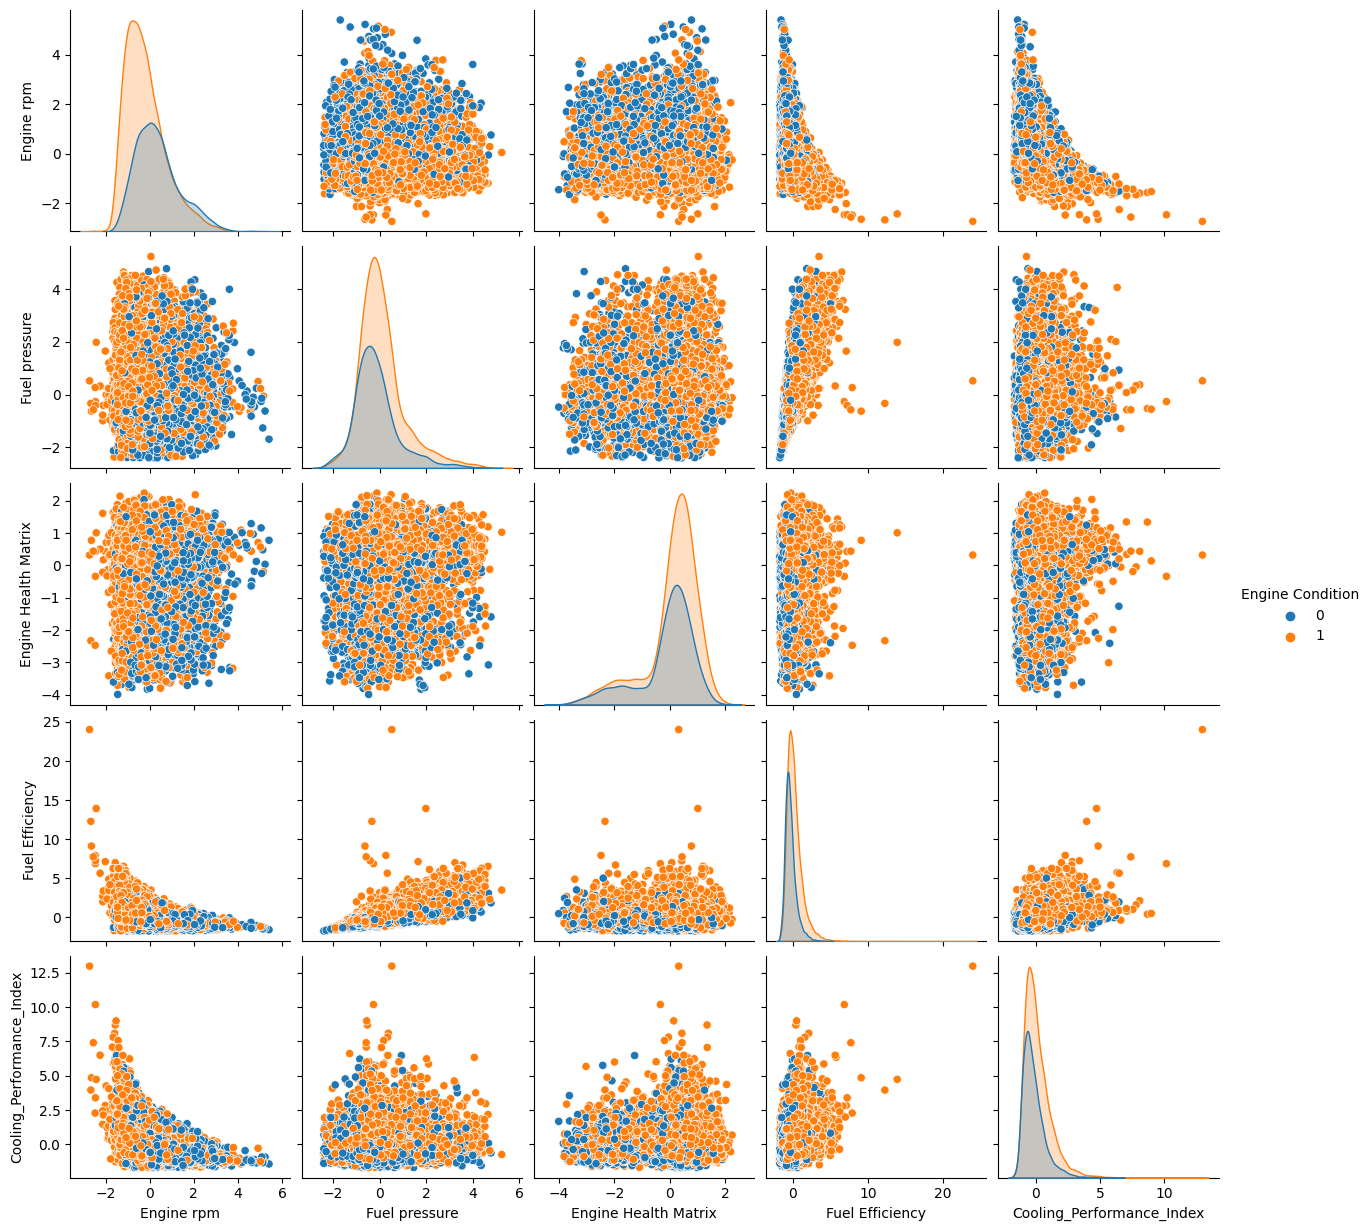

In [78]:
sns.pairplot(engine_df_ex, hue="Engine Condition")

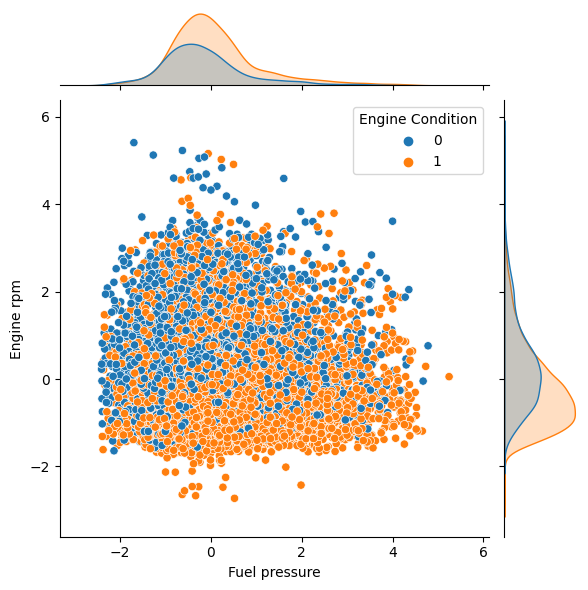

In [84]:
sns.jointplot(engine_df_ex, x="Fuel pressure", y="Engine rpm", hue="Engine Condition")

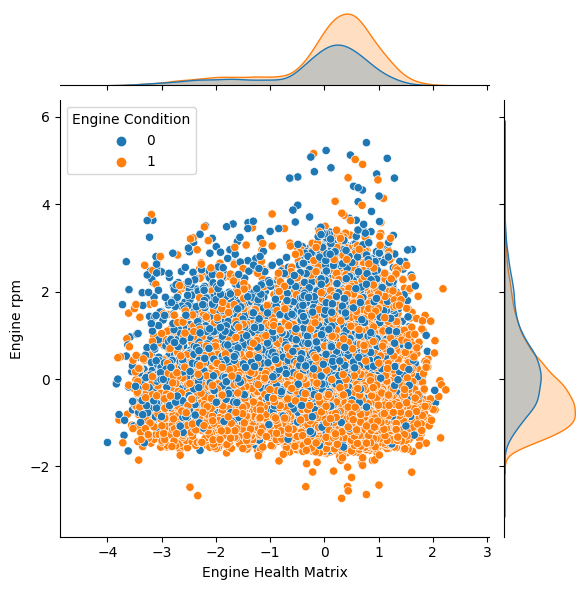

In [85]:
sns.jointplot(engine_df_ex, x="Engine Health Matrix", y="Engine rpm", hue="Engine Condition")

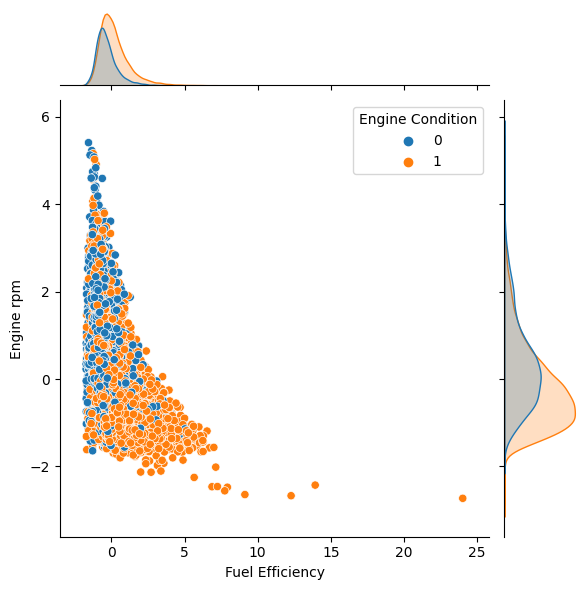

In [79]:
sns.jointplot(engine_df_ex, x="Fuel Efficiency", y="Engine rpm", hue="Engine Condition")


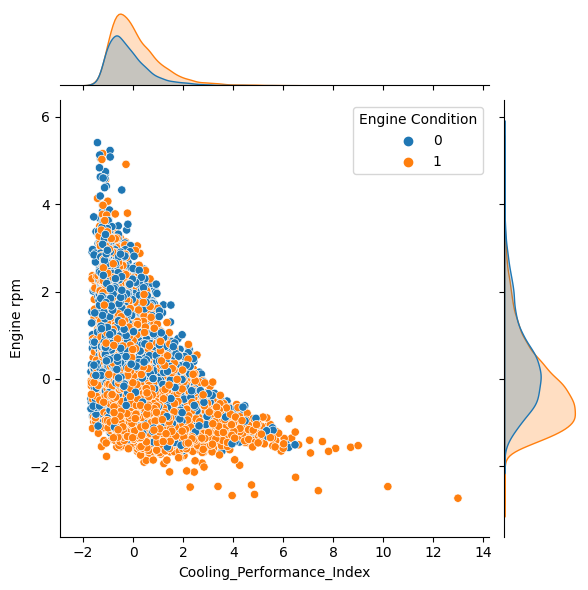

In [80]:
sns.jointplot(engine_df_ex, x="Cooling_Performance_Index", y="Engine rpm", hue="Engine Condition")

## Outlier detection and removal

In [80]:
from scipy import stats

# Calculate Z-Scores for each feature
z_scores = stats.zscore(engine_df_ex)
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)
outliers

Engine rpm  Fuel pressure  Engine Condition  Engine Health Matrix  \
0           False          False             False                 False   
1           False           True             False                 False   
2           False          False             False                 False   
3           False           True             False                 False   
4           False           True             False                 False   
...           ...            ...               ...                   ...   
19530       False          False             False                 False   
19531       False          False             False                 False   
19532       False          False             False                 False   
19533       False          False             False                 False   
19534       False          False             False                 False   

       Fuel Efficiency  Cooling_Performance_Index  
0                False                      False  
1                False                      False  
2                False                      False  
3                 True                      False  
4                False                      False  
...                ...                        ...  
19530            False                      False  
19531            False                      False  
19532            False                      False  
19533            False                      False  
19534            False                      False  

[19535 rows x 6 columns]

In [81]:
# Remove outliers from the dataset
cleaned_engine_df_ex = engine_df_ex[~outliers.any(axis=1)]
cleaned_engine_df_ex

Engine rpm  Fuel pressure  Engine Condition  Engine Health Matrix  \
0       -0.340948       1.859980                 1             -2.227485   
2       -1.013583      -0.037114                 1             -0.137372   
5        1.605956       0.008553                 0              0.587335   
6       -0.281159      -0.486553                 1             -1.748262   
7       -0.232579       1.280541                 1              0.080316   
...           ...            ...               ...                   ...   
19530    0.413897      -0.606405                 1              0.763316   
19531   -0.363370       1.525231                 1              1.180916   
19532   -0.400738      -0.625958                 1              0.051201   
19533   -0.355896       0.592622                 1              0.077424   
19534   -1.073373      -0.975438                 1              0.777107   

       Fuel Efficiency  Cooling_Performance_Index  
0             1.231847                   0.538024  
2             0.539535                  -0.629985  
5            -0.697000                  -0.782010  
6            -0.399268                  -0.032010  
7             1.069365                  -0.182445  
...                ...                        ...  
19530        -0.833431                   1.131167  
19531         1.269707                   2.797460  
19532        -0.536624                  -0.108940  
19533         0.591145                  -0.843526  
19534        -0.330526                   0.486992  

[18356 rows x 6 columns]

## Model Building For Feature Extention

In [85]:
# x is used as the input features

X=engine_df_ex.drop(['Engine Condition'],axis=1)

# y as the target variable for a predictive model.

y=engine_df_ex[['Engine Condition']]

In [86]:
#  To split a dataset into training and testing subsets

X_train_ex,X_test_ex,y_train_ex,y_test_ex=train_test_split(X,y,test_size=0.30,random_state=123)

In [87]:
# To display the shapes of x_train and y_train
print(X_train_ex.shape)
print(y_train_ex.shape)

(13674, 5)
(13674, 1)


### Model Building For Feature Extention (After Outlier removal)

In [82]:
# x is used as the input features

Xc=cleaned_engine_df_ex.drop(['Engine Condition'],axis=1)

# y as the target variable for a predictive model.

yc=cleaned_engine_df_ex[['Engine Condition']]

In [83]:
#  To split a dataset into training and testing subsets

Xc_train_ex,Xc_test_ex,yc_train_ex,yc_test_ex=train_test_split(Xc,yc,test_size=0.30,random_state=123)

In [84]:
# To display the shapes of x_train and y_train
print(Xc_train_ex.shape)
print(yc_train_ex.shape)

(12849, 5)
(12849, 1)


# Logistic Regression

In [86]:
# create an instance of the LogisticRegression class and assigns it to the variable

logistic_model=LogisticRegression(verbose=True)


In [87]:
# Fit the Logistic Regression model

logistic_model.fit(X_train_ex,y_train_ex)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.47809D+03    |proj g|=  1.83600D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     12     14      1     0     0   5.758D-02   8.251D+03
  F =   8251.2711483369931     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=True)

In [88]:
# Predict on training and test data

y_train_predicted = logistic_model.predict(X_train_ex)
y_test_predicted = logistic_model.predict(X_test_ex)


In [89]:
# Accuracy - Training Data

logistic_model.score(X_train_ex,y_train_ex)

0.6651309053678514

In [90]:
# Accuracy - Test data

logistic_model.score(X_test_ex,y_test_ex)

0.6533014843883297

In [91]:
# To print the classification report for train data

print(classification_report(y_train_ex,y_train_predicted))

              precision    recall  f1-score   support

           0       0.58      0.31      0.40      5001
           1       0.69      0.87      0.77      8673

    accuracy                           0.67     13674
   macro avg       0.63      0.59      0.59     13674
weighted avg       0.65      0.67      0.63     13674



In [92]:
# To print the classification report for test data

print(classification_report(y_test_ex,y_test_predicted))

              precision    recall  f1-score   support

           0       0.57      0.32      0.41      2217
           1       0.67      0.85      0.75      3644

    accuracy                           0.65      5861
   macro avg       0.62      0.59      0.58      5861
weighted avg       0.64      0.65      0.63      5861



## Decision Tree Classifier

In [93]:
# Initialise a Decision Tree Classifier and assign it to variable

dt_model= DecisionTreeClassifier(max_depth=3)

In [94]:
# Fit the model DecisionTreeClassifier model

dt_model.fit(X_train_ex,y_train_ex)

DecisionTreeClassifier(max_depth=3)

In [95]:
# Predict on training and test data


ytrain_predict=dt_model.predict(X_train_ex)
ytest_predict=dt_model.predict(X_test_ex)

In [96]:
# Accuracy - Training Data

dt_model.score(X_train_ex,y_train_ex)

0.6681292964750621

In [97]:
# Accuracy - Test data

dt_model.score(X_test_ex,y_test_ex)

0.6531308650400955

In [98]:
# To print the classification report for train data

print(classification_report(y_train_ex,ytrain_predict))

              precision    recall  f1-score   support

           0       0.59      0.32      0.41      5001
           1       0.69      0.87      0.77      8673

    accuracy                           0.67     13674
   macro avg       0.64      0.59      0.59     13674
weighted avg       0.65      0.67      0.64     13674



In [99]:
# To print the classification report for test data

print(classification_report(y_test_ex,ytest_predict))

              precision    recall  f1-score   support

           0       0.57      0.33      0.42      2217
           1       0.68      0.85      0.75      3644

    accuracy                           0.65      5861
   macro avg       0.62      0.59      0.58      5861
weighted avg       0.64      0.65      0.63      5861



## Random Forest Classifier

In [100]:
# create an instance of the RandomForestClassifier class and assigns it to the variable
Rf_model= RandomForestClassifier(max_depth=3)

In [101]:
# Fit the RandomForestClassifier model
Rf_model.fit(X_train_ex,y_train_ex)

RandomForestClassifier(max_depth=3)

In [102]:
# Predict on training and test data
ytrain_predict=Rf_model.predict(X_train_ex)
ytest_predict=Rf_model.predict(X_test_ex)

In [103]:
# Accuracy - Training Data
Rf_model.score(X_train_ex,y_train_ex)

0.6714933450343717

In [104]:
# Accuracy - Test data

Rf_model.score(X_test_ex,y_test_ex)

0.6604674970141614

In [105]:
# To print the classification report for train data

print(classification_report(y_train_ex,ytrain_predict))

              precision    recall  f1-score   support

           0       0.60      0.31      0.41      5001
           1       0.69      0.88      0.77      8673

    accuracy                           0.67     13674
   macro avg       0.64      0.59      0.59     13674
weighted avg       0.66      0.67      0.64     13674



In [106]:
# To print the classification report for test data

print(classification_report(y_test_ex,ytest_predict))

              precision    recall  f1-score   support

           0       0.60      0.32      0.41      2217
           1       0.68      0.87      0.76      3644

    accuracy                           0.66      5861
   macro avg       0.64      0.59      0.59      5861
weighted avg       0.65      0.66      0.63      5861



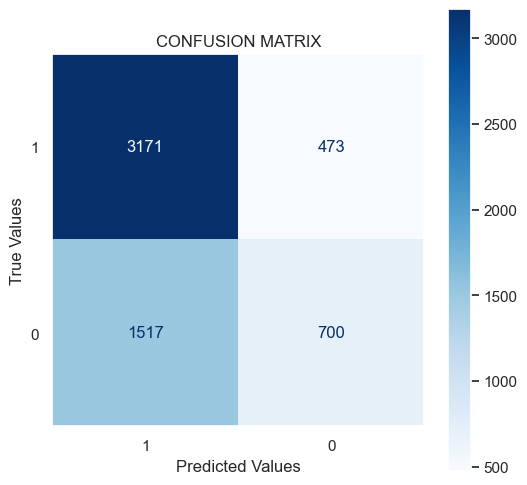

In [107]:
sns.set(rc = {"figure.figsize":(6,6)})
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test_ex,ytest_predict,labels=(1,0),normalize=None,cmap='Blues')
disp.ax_.grid(False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX")
plt.show()

## Random Forest Classifier with Hyperparameter optimization

In [108]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform hyperparameter tuning
grid_search.fit(X_train_ex, y_train_ex)

# Get the best hyperparameters and corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.6682753704785964


### Random Forest Classifier with Outlire removed dataset

In [89]:
# create an instance of the RandomForestClassifier class and assigns it to the variable
Rf_model= RandomForestClassifier(max_depth=10)

In [90]:
# Fit the RandomForestClassifier model
Rf_model.fit(Xc_train_ex,yc_train_ex)

RandomForestClassifier(max_depth=10)

In [91]:
# Predict on training and test data
ytrain_predict=Rf_model.predict(Xc_train_ex)
ytest_predict=Rf_model.predict(Xc_test_ex)

In [92]:
# Accuracy - Training Data
Rf_model.score(Xc_train_ex,yc_train_ex)

0.7820842088878512

In [93]:
# Accuracy - Test data

Rf_model.score(Xc_test_ex,yc_test_ex)

0.6615216996549845

In [94]:
# To print the classification report for train data

print(classification_report(yc_train_ex,ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.56      0.66      4810
           1       0.78      0.92      0.84      8039

    accuracy                           0.78     12849
   macro avg       0.79      0.74      0.75     12849
weighted avg       0.78      0.78      0.77     12849



In [95]:
# To print the classification report for test data

print(classification_report(yc_test_ex,ytest_predict))

              precision    recall  f1-score   support

           0       0.56      0.38      0.45      2039
           1       0.69      0.83      0.76      3468

    accuracy                           0.66      5507
   macro avg       0.63      0.60      0.60      5507
weighted avg       0.65      0.66      0.64      5507



### K-Nearest Neighbor Classifier

In [119]:
# creates an instance of the KNeighborsClassifier class and assigns it to the variable

knn_model = KNeighborsClassifier()

In [120]:
# Fit the KNeighborsClassifier model

knn_model.fit(X_train_ex,y_train_ex)

KNeighborsClassifier()

In [121]:
# Predict on training and test data


ytrain_predict=knn_model.predict(X_train_ex)
ytest_predict=knn_model.predict(X_test_ex)

In [122]:
# Accuracy - Training Data

knn_model.score(X_train_ex,y_train_ex)

0.7467507199003813

In [123]:
# Accuracy - Test data

knn_model.score(X_test_ex,y_test_ex)

0.6193934991828581

In [124]:
# To print the classification report for train data

print(classification_report(y_train_ex,ytrain_predict))

              precision    recall  f1-score   support

           0       0.69      0.58      0.63      4810
           1       0.77      0.85      0.81      8039

    accuracy                           0.75     12849
   macro avg       0.73      0.71      0.72     12849
weighted avg       0.74      0.75      0.74     12849



In [125]:
# To print the classification report for test data

print(classification_report(y_test_ex,ytest_predict))

              precision    recall  f1-score   support

           0       0.48      0.41      0.44      2039
           1       0.68      0.74      0.71      3468

    accuracy                           0.62      5507
   macro avg       0.58      0.58      0.58      5507
weighted avg       0.61      0.62      0.61      5507



### Support Vector Machine

In [126]:
#  creates an instance of the SVC class from the svm module and assigns it to the variable

svc_model = SVC()

In [127]:
# Fit the  SVC  model

svc_model.fit(X_train_ex,y_train_ex)

SVC()

In [128]:
# Predict on training and test data
ytrain_predict=svc_model.predict(X_train_ex)
ytest_predict=svc_model.predict(X_test_ex)

In [129]:
# Accuracy - Training Data
svc_model.score(X_train_ex,y_train_ex)

0.6677562456222275

In [130]:
# Accuracy - Test data
svc_model.score(X_test_ex,y_test_ex)

0.6611585255129835

In [131]:
# To print the classification report for train data

print(classification_report(y_train_ex,ytrain_predict))

              precision    recall  f1-score   support

           0       0.61      0.31      0.41      4810
           1       0.68      0.88      0.77      8039

    accuracy                           0.67     12849
   macro avg       0.65      0.59      0.59     12849
weighted avg       0.66      0.67      0.63     12849



In [132]:
# To print the classification report for test data

print(classification_report(y_test_ex,ytest_predict))

              precision    recall  f1-score   support

           0       0.58      0.29      0.39      2039
           1       0.68      0.88      0.77      3468

    accuracy                           0.66      5507
   macro avg       0.63      0.59      0.58      5507
weighted avg       0.64      0.66      0.63      5507



## Extreme Gradient Boosting

In [133]:
# Create an XGBoost classifier object and assigns  it to variable

xgb_model = xgb.XGBClassifier()


In [134]:
#  Fits  the XGBoost model on the training data

xgb_model.fit(X_train_ex, y_train_ex)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [135]:
# Accuracy - Training Data

xgb_model.score(X_train_ex,y_train_ex)

0.8466028484706981

In [136]:
# Accuracy - Test data

xgb_model.score(X_test_ex,y_test_ex)

0.6424550571999273

In [137]:
# Predict on training and test data

ytrain_predict=xgb_model.predict(X_train_ex)

ytest_pred = xgb_model.predict(X_test_ex)

In [138]:
# To print the classification report for train data

print(classification_report(y_train_ex,ytrain_predict))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77      4810
           1       0.84      0.94      0.88      8039

    accuracy                           0.85     12849
   macro avg       0.85      0.82      0.83     12849
weighted avg       0.85      0.85      0.84     12849



In [139]:
# To print the classification report for test data

print(classification_report(y_test_ex,ytest_predict))

              precision    recall  f1-score   support

           0       0.58      0.29      0.39      2039
           1       0.68      0.88      0.77      3468

    accuracy                           0.66      5507
   macro avg       0.63      0.59      0.58      5507
weighted avg       0.64      0.66      0.63      5507

